<a href="https://colab.research.google.com/github/tcnisaa/metnum_pertemuan10_Tangguh-Chairunnisa/blob/main/metnum_pertemuan10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tangguh chairunnisa 21120122140103

Implementasi Interpolasi Polinom Lagrange

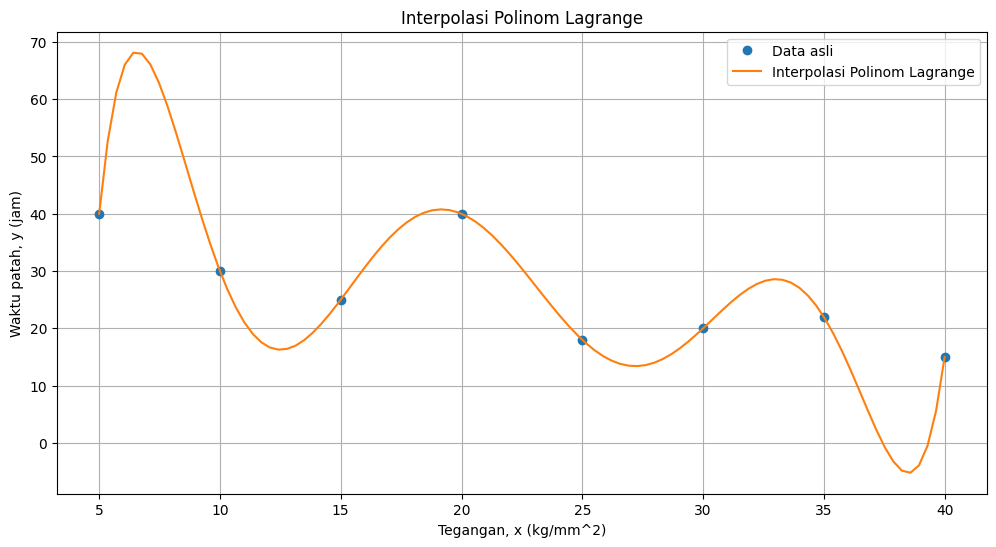

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data yang diberikan
x_data = np.array([5, 10, 15, 20, 25, 30, 35, 40])
y_data = np.array([40, 30, 25, 40, 18, 20, 22, 15])

def lagrange_interpolation(x, x_data, y_data):
    def L(k, x):
        result = 1
        for i in range(len(x_data)):
            if i != k:
                result *= (x - x_data[i]) / (x_data[k] - x_data[i])
        return result

    result = 0
    for k in range(len(x_data)):
        result += y_data[k] * L(k, x)
    return result

# Menguji interpolasi polinom Lagrange
x_test = np.linspace(5, 40, 100)
y_test_lagrange = [lagrange_interpolation(x, x_data, y_data) for x in x_test]

# Plot hasil interpolasi polinom Lagrange
plt.figure(figsize=(12, 6))
plt.plot(x_data, y_data, 'o', label='Data asli')
plt.plot(x_test, y_test_lagrange, label='Interpolasi Polinom Lagrange')
plt.xlabel('Tegangan, x (kg/mm^2)')
plt.ylabel('Waktu patah, y (jam)')
plt.title('Interpolasi Polinom Lagrange')
plt.legend()
plt.grid(True)
plt.show()


Implementasi Interpolasi Polinom Newton

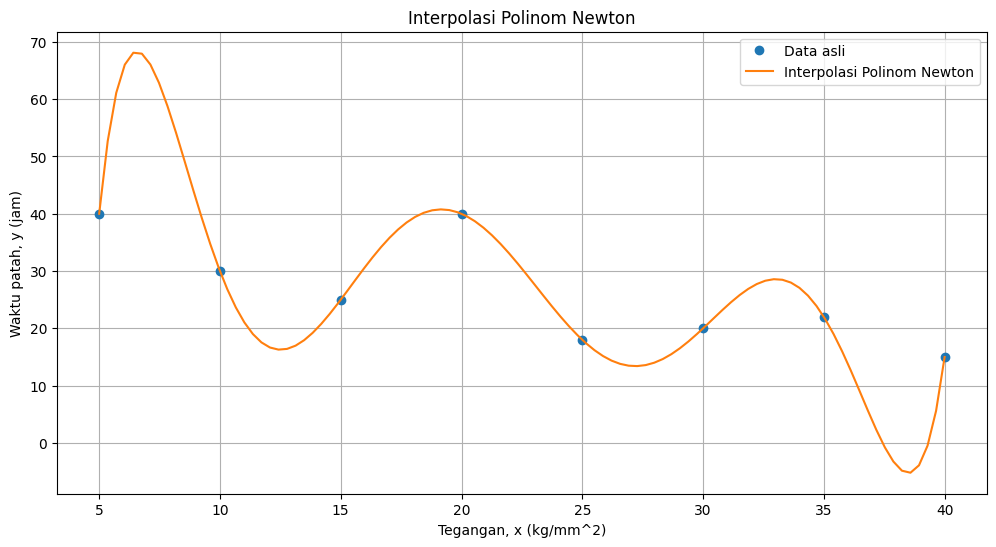

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data yang diberikan
x_data = np.array([5, 10, 15, 20, 25, 30, 35, 40])
y_data = np.array([40, 30, 25, 40, 18, 20, 22, 15])

def newton_interpolation(x, x_data, y_data):
    def divided_diff(x_data, y_data):
        n = len(y_data)
        coef = np.zeros([n, n])
        coef[:,0] = y_data
        for j in range(1, n):
            for i in range(n - j):
                coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x_data[i+j] - x_data[i])
        return coef[0, :]

    def newton_poly(coef, x_data, x):
        n = len(coef) - 1
        p = coef[n]
        for k in range(1, n+1):
            p = coef[n-k] + (x - x_data[n-k]) * p
        return p

    coef = divided_diff(x_data, y_data)
    return newton_poly(coef, x_data, x)

# Menguji interpolasi polinom Newton
y_test_newton = [newton_interpolation(x, x_data, y_data) for x in x_test]

# Plot hasil interpolasi polinom Newton
plt.figure(figsize=(12, 6))
plt.plot(x_data, y_data, 'o', label='Data asli')
plt.plot(x_test, y_test_newton, label='Interpolasi Polinom Newton')
plt.xlabel('Tegangan, x (kg/mm^2)')
plt.ylabel('Waktu patah, y (jam)')
plt.title('Interpolasi Polinom Newton')
plt.legend()
plt.grid(True)
plt.show()
